In [1]:
#Happy House Dataset
#Detect whether a person is smiling or not!
#Using CNN

In [2]:
import numpy as np
import h5py

import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import keras 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation, Dropout
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

import seaborn as sns

Using TensorFlow backend.


In [3]:
#function to load data
def load_dataset():
    train_data = h5py.File('train_happy.h5', "r")
    x_train = np.array(train_data["train_set_x"][:]) 
    y_train = np.array(train_data["train_set_y"][:]) 

    test_data = h5py.File('test_happy.h5', "r")
    x_test = np.array(test_data["test_set_x"][:])
    y_test = np.array(test_data["test_set_y"][:]) 
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return x_train, y_train, x_test, y_test

In [4]:
# Load the data
X_train, Y_train, X_test, Y_test = load_dataset()

y = 1


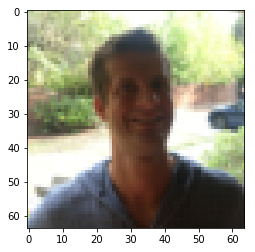

In [5]:
# Example of an image
index = 1
plt.imshow(X_train[index])
print ("y = " + str(np.squeeze(Y_train[:, index])))

In [6]:
#check shape of our data
print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

(600, 64, 64, 3)
(150, 64, 64, 3)
(1, 600)
(1, 150)


In [7]:
#Rescale data
X_train = X_train/255.
X_test = X_test/255.
Y_train = Y_train.T
Y_test = Y_test.T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [8]:
#our CNN model

model = Sequential()

#Conv layer 1 
#input 64x64x3
model.add(Conv2D(64,(5,5), padding = 'Same', activation = 'relu', input_shape = (64,64,3)))
model.add(BatchNormalization())

#Pooling layer 1
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))



#Conv layer 2
model.add(Conv2D(64, (5,5), padding = 'Same', activation = 'relu'))
model.add(BatchNormalization())


#Pooling layer 2
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))

#Flatten
model.add(Flatten())

#Fully connected layer 1
model.add(Dense(128, activation = 'relu'))

#Output Layer
model.add(Dense(units = 1,kernel_initializer="uniform", activation = 'sigmoid'))


# Compiling Neural Network
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
model.fit(X_train, Y_train, batch_size=20, epochs=35)


Epoch 1/35
600/600 [==============================] - 22s 36ms/step - loss: 0.7537 - acc: 0.6633
Epoch 2/35
600/600 [==============================] - 17s 28ms/step - loss: 0.3674 - acc: 0.8417
Epoch 3/35
600/600 [==============================] - 17s 29ms/step - loss: 0.2932 - acc: 0.8550
Epoch 4/35
600/600 [==============================] - 16s 27ms/step - loss: 0.2091 - acc: 0.9000
Epoch 5/35
600/600 [==============================] - 16s 26ms/step - loss: 0.1573 - acc: 0.9317
Epoch 6/35
600/600 [==============================] - 16s 26ms/step - loss: 0.1305 - acc: 0.9617
Epoch 7/35
600/600 [==============================] - 16s 26ms/step - loss: 0.1084 - acc: 0.9667
Epoch 8/35
600/600 [==============================] - 16s 26ms/step - loss: 0.0766 - acc: 0.9750
Epoch 9/35
600/600 [==============================] - 16s 26ms/step - loss: 0.0846 - acc: 0.9683
Epoch 10/35
600/600 [==============================] - 16s 27ms/step - loss: 0.0698 - acc: 0.9767
Epoch 11/35
600/600 [========

In [10]:
# Predict the test set results
Y_pred = model.predict_classes(X_test)

test accuracy: 0.9666666666666667
precision: 0.9759036144578314
recall: 0.9642857142857143
f1 score: 0.970059880239521


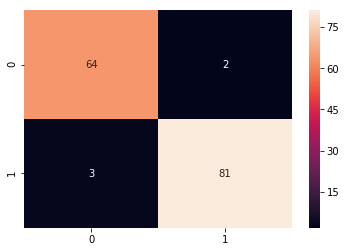

In [11]:
print 'test accuracy:', accuracy_score(Y_test, Y_pred)
print 'precision:', precision_score(Y_test, Y_pred)
print 'recall:',recall_score(Y_test, Y_pred)
print 'f1 score:', f1_score(Y_test, Y_pred)


cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True)